In [1]:
import matplotlib
#matplotlib.use('TKagg')
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import json 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def json_load(filename):
   with open(filename) as f_in:
       return(json.load(f_in)["mean"]["point_estimate"])

In [3]:
def load_files(dirname):
    folders = os.listdir(dirname)
    #print(folders)
    csv_files = list(map(lambda name: os.path.join(os.path.join(dirname, name),'new/raw.csv'), folders))

    #print(csv_files)


    df_from_each_file = (pd.read_csv(f, sep=',') for f in csv_files)
    #print(list(df_from_each_file))
    df_from_each_file = (f.head(1) for f in df_from_each_file)
    #print(list(df_from_each_file))
    return df_from_each_file
dirname = './benchmarks_schedulers/parallel_speculative_par_iter'
df_from_each_file = list(load_files(dirname)) 


In [4]:
df_merged   = pd.concat(df_from_each_file, ignore_index=True)

del df_merged["group"]
del df_merged["throughput_type"]
del df_merged["sample_measured_value"]
del df_merged["unit"]
del df_merged["iteration_count"]



In [5]:
folders = df_merged['value']
df_merged["time"] = list(map(lambda name: json_load(os.path.join(os.path.join(dirname, name),'new/estimates.json')), folders))



In [6]:

time = df_merged['time']
value = df_merged['value']

In [7]:
def size_calculation(value):
    element_size = int(value.split("-")[0])
    vector_size = int(value.split("-")[1])
    matrixs_size =  (((32 * element_size * element_size) * 3) * 2) * vector_size
    #normal_elements_size = ((6 * 32 * 1000) + (2 * 32 * 1000) + (6 * 32)) * vector_size
   
    return matrixs_size /8

In [8]:
#df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(throughput_num, time))))
#df_merged['size'] = list(map(lambda value: value/(1024**2), throughput_num))
#df_merged['time'] = list(map(lambda value: value/1000000, time))
#df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
#df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))



del df_merged["throughput_num"]
df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))
df_merged["throughput_num"] = list(map(lambda v: size_calculation(v), value))
df_merged['time'] = list(map(lambda value: value/1000000, time))
df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(df_merged["throughput_num"], df_merged['time']))))
df_merged['size'] = list(map(lambda value: value/(1024**2), df_merged["throughput_num"]))




In [9]:
a = df_merged.sort_values(by=["size"], ascending=False)
b = df_merged.sort_values(by=["time"], ascending=True)
#a.to_csv( "merged.csv")
#b.to_csv( "merged2.csv")


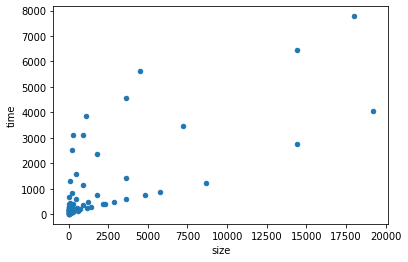

In [10]:

a.plot(x='size', y='time', kind = 'scatter')
plt.show()

<AxesSubplot:xlabel='size'>

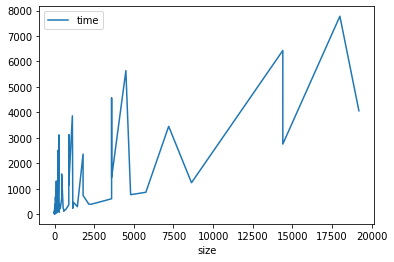

In [11]:
a.plot(x='size', y="time")

<AxesSubplot:xlabel='size', ylabel='time'>

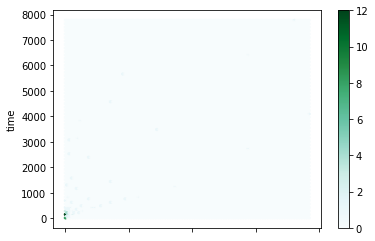

In [12]:
a.plot(x='size', y="time", kind='hexbin')

<AxesSubplot:xlabel='time', ylabel='size'>

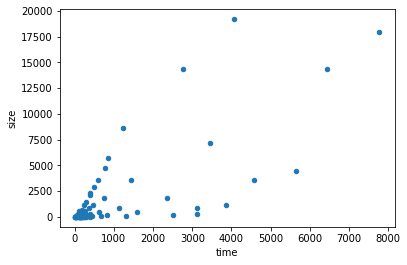

In [13]:
a.plot(x='time', y='size', kind = 'scatter')

<AxesSubplot:xlabel='time'>

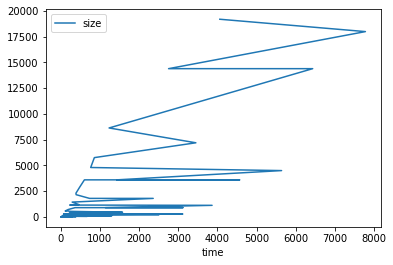

In [14]:
a.plot(x='time', y='size')


In [15]:
a

,function,value,time,element_size,vector_size,throughput_num,throughput,size
9,parallel_speculative_par_iter,1024-800,4061.079610,1024,800,2.013266e+10,4.957465e+06,19200.00000
59,parallel_speculative_par_iter,256-12000,7776.985197,256,12000,1.887437e+10,2.426952e+06,18000.00000
27,parallel_speculative_par_iter,1024-600,2752.676355,1024,600,1.509949e+10,5.485387e+06,14400.00000
21,parallel_speculative_par_iter,256-9600,6431.442399,256,9600,1.509949e+10,2.347762e+06,14400.00000
46,parallel_speculative_par_iter,1024-360,1233.800480,1024,360,9.059697e+09,7.342919e+06,8640.00000
...,...,...,...,...,...,...,...,...
17,parallel_speculative_par_iter,64-24,31.359178,64,24,2.359296e+06,7.523463e+04,2.25000
10,parallel_speculative_par_iter,32-48,99.925102,32,48,1.179648e+06,1.180532e+04,1.12500
45,parallel_speculative_par_iter,64-12,7.915049,64,12,1.179648e+06,1.490386e+05,1.12500
57,parallel_speculative_par_iter,32-24,32.025469,32,24,5.898240e+05,1.841734e+04,0.56250


In [16]:
b.loc[b['time']  > 500 ]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
39,parallel_speculative_par_iter,512-600,604.067205,512,600,3.774874e+09,6.249095e+06,3600.00
29,parallel_speculative_par_iter,128-1200,611.398813,128,1200,4.718592e+08,7.717699e+05,450.00
42,parallel_speculative_par_iter,32-2400,675.774943,32,2400,5.898240e+07,8.728113e+04,56.25
16,parallel_speculative_par_iter,256-1200,735.408844,256,1200,1.887437e+09,2.566514e+06,1800.00
69,parallel_speculative_par_iter,512-800,764.414646,512,800,5.033165e+09,6.584339e+06,4800.00
2,parallel_speculative_par_iter,64-2400,815.684390,64,2400,2.359296e+08,2.892413e+05,225.00
23,parallel_speculative_par_iter,1024-240,857.992155,1024,240,6.039798e+09,7.039456e+06,5760.00
58,parallel_speculative_par_iter,128-2400,1139.144218,128,2400,9.437184e+08,8.284451e+05,900.00
46,parallel_speculative_par_iter,1024-360,1233.800480,1024,360,9.059697e+09,7.342919e+06,8640.00
11,parallel_speculative_par_iter,32-4800,1302.254454,32,4800,1.179648e+08,9.058506e+04,112.50


In [17]:
b

,function,value,time,element_size,vector_size,throughput_num,throughput,size
55,parallel_speculative_par_iter,32-12,7.532526,32,12,2.949120e+05,3.915181e+04,0.28125
45,parallel_speculative_par_iter,64-12,7.915049,64,12,1.179648e+06,1.490386e+05,1.12500
33,parallel_speculative_par_iter,128-12,12.499345,128,12,4.718592e+06,3.775071e+05,4.50000
14,parallel_speculative_par_iter,256-12,18.053959,256,12,1.887437e+07,1.045442e+06,18.00000
49,parallel_speculative_par_iter,512-12,25.918310,512,12,7.549747e+07,2.912901e+06,72.00000
...,...,...,...,...,...,...,...,...
9,parallel_speculative_par_iter,1024-800,4061.079610,1024,800,2.013266e+10,4.957465e+06,19200.00000
26,parallel_speculative_par_iter,128-9600,4564.895104,128,9600,3.774874e+09,8.269355e+05,3600.00000
41,parallel_speculative_par_iter,128-12000,5637.398584,128,12000,4.718592e+09,8.370159e+05,4500.00000
21,parallel_speculative_par_iter,256-9600,6431.442399,256,9600,1.509949e+10,2.347762e+06,14400.00000


<AxesSubplot:xlabel='time'>

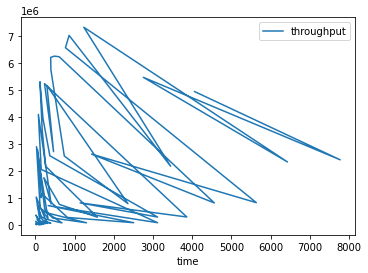

In [18]:
a.plot(x='time', y='throughput')


<AxesSubplot:xlabel='size'>

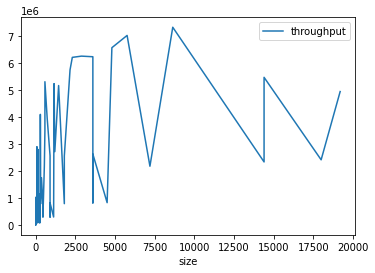

In [19]:
a.plot(x='size', y='throughput')


<AxesSubplot:xlabel='vector_size'>

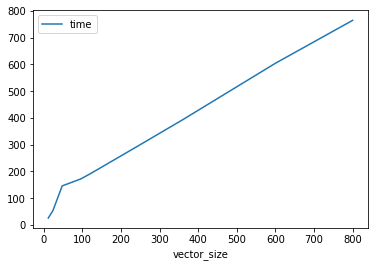

In [20]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

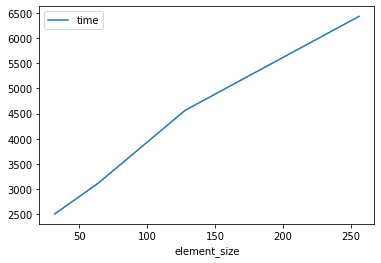

In [21]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='time')


<AxesSubplot:xlabel='vector_size'>

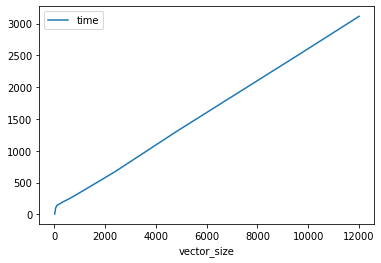

In [22]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

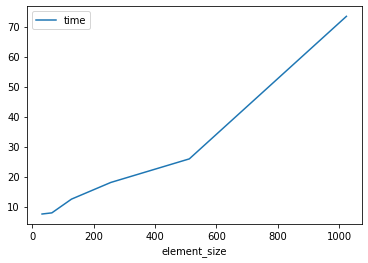

In [23]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='time')


In [24]:
a[a.value.str.contains(r".*-800$")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
9,parallel_speculative_par_iter,1024-800,4061.079610,1024,800,2.013266e+10,4.957465e+06,19200.00
69,parallel_speculative_par_iter,512-800,764.414646,512,800,5.033165e+09,6.584339e+06,4800.00
52,parallel_speculative_par_iter,256-800,460.975742,256,800,1.258291e+09,2.729626e+06,1200.00
48,parallel_speculative_par_iter,128-800,398.712834,128,800,3.145728e+08,7.889708e+05,300.00
66,parallel_speculative_par_iter,64-800,319.066150,64,800,7.864320e+07,2.464793e+05,75.00
65,parallel_speculative_par_iter,32-800,296.734272,32,800,1.966080e+07,6.625726e+04,18.75


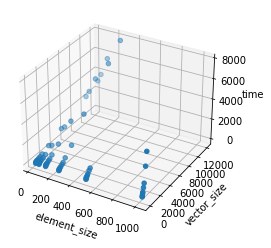

In [25]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(a['element_size'], a['vector_size'],a['time'])
threedee.set_xlabel('element_size')
threedee.set_ylabel('vector_size')
threedee.set_zlabel('time')
plt.show()

No handles with labels found to put in legend.


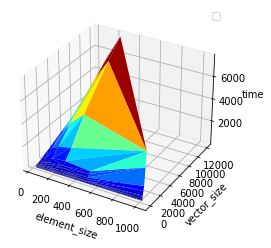

In [26]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()

ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.jet, linewidth=0.2)
plt.show()

No handles with labels found to put in legend.


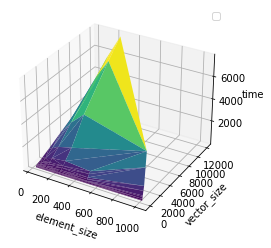

In [27]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()
plt.show()

No handles with labels found to put in legend.


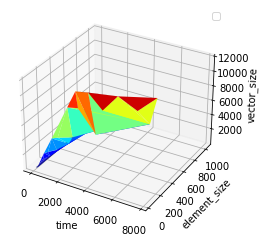

In [28]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['time'], a['element_size'],a['vector_size'], cmap=plt.cm.jet, linewidth=0.1)
ax.set_xlabel("time")
ax.set_ylabel("element_size")
ax.set_zlabel("vector_size")
ax.legend()
plt.show()

<AxesSubplot:xlabel='element_size'>

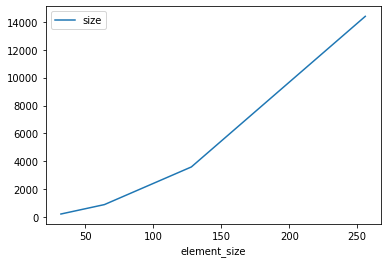

In [29]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='element_size'>

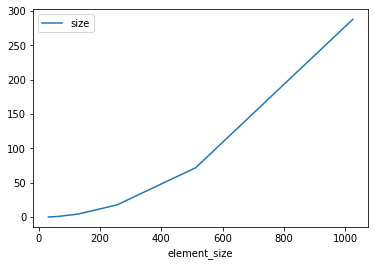

In [30]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='vector_size'>

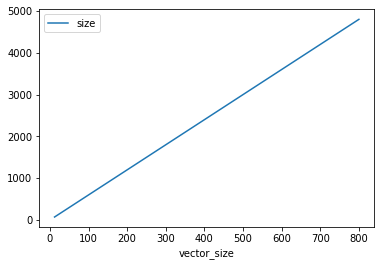

In [31]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='size')


<AxesSubplot:xlabel='vector_size'>

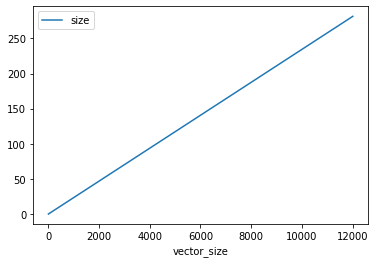

In [32]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='size')


In [33]:
b[b.value.str.contains(r"^512")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
49,parallel_speculative_par_iter,512-12,25.918310,512,12,7.549747e+07,2.912901e+06,72.0
32,parallel_speculative_par_iter,512-24,53.775092,512,24,1.509949e+08,2.807897e+06,144.0
38,parallel_speculative_par_iter,512-48,145.933179,512,48,3.019899e+08,2.069371e+06,288.0
4,parallel_speculative_par_iter,512-96,171.790655,512,96,6.039798e+08,3.515789e+06,576.0
12,parallel_speculative_par_iter,512-120,190.719164,512,120,7.549747e+08,3.958568e+06,720.0
72,parallel_speculative_par_iter,512-240,291.476456,512,240,1.509949e+09,5.180348e+06,1440.0
71,parallel_speculative_par_iter,512-360,393.145317,512,360,2.264924e+09,5.761036e+06,2160.0
39,parallel_speculative_par_iter,512-600,604.067205,512,600,3.774874e+09,6.249095e+06,3600.0
69,parallel_speculative_par_iter,512-800,764.414646,512,800,5.033165e+09,6.584339e+06,4800.0
